# **Loan Prediction and Analysis Using Machine Learning**

Table of Content:
1. Feature Engineering
2. Data Cleaning
4. Exploratory Data Analysis
5. Pre-Processing Data
6. Machine Learning Model
7. Evaluation Model
8. Conclusions



Dataset Source: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

Dataset Description: The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

Features:
1. loan_id -------------->Unique loan ID
2. no_of_dependents-------------->Number of dependents of the applicant
3. education-------------->Education level of the applicant
4. self_employed-------------->If the applicant is self-employed or not
5. income_annum-------------->Annual income of the applicant
6. loan_amount-------------->Loan amount requested by the applicant
7. loan_tenure-------------->Tenure of the loan requested by the applicant (in Years)
8. cibil_score-------------->CIBIL score of the applicant
9. residential_asset_value-------------->Value of the residential asset of the applicant
10. commercial_asset_value-------------->Value of the commercial asset of the applicant
11. luxury_asset_value-------------->Value of the luxury asset of the applicant
12. bank_assets_value-------------->Value of the bank asset of the applicant
13. loan_status-------------->Status of the loan (Approved/Rejected)

1. Feature Engineering

In [53]:
#importing packages
import pandas as pd
import numpy as np

In [54]:
from google.colab import files
files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset (1).csv


{'loan_approval_dataset (1).csv': b'loan_id, no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status\r\n1,2, Graduate, No,9600000,29900000,12,778,2400000,17600000,22700000,8000000, Approved\r\n2,0, Not Graduate, Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000, Rejected\r\n3,3, Graduate, No,9100000,29700000,20,506,7100000,4500000,33300000,12800000, Rejected\r\n4,3, Graduate, No,8200000,30700000,8,467,18200000,3300000,23300000,7900000, Rejected\r\n5,5, Not Graduate, Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000, Rejected\r\n6,0, Graduate, Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000, Rejected\r\n7,5, Graduate, No,8700000,33000000,4,678,22500000,14800000,29200000,4300000, Approved\r\n8,2, Graduate, Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000, Rejected\r\n9,0, Graduate, Yes,800000,2200000,20

In [55]:
df=pd.read_csv('loan_approval_dataset.csv')

In [56]:
df.sample(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
74,75,2,Not Graduate,No,2600000,8400000,6,494,6500000,3800000,5600000,2000000,Rejected
1364,1365,1,Not Graduate,No,6400000,14100000,20,553,11700000,4500000,20000000,3600000,Approved
2882,2883,5,Not Graduate,Yes,7000000,24000000,14,450,10300000,5700000,21100000,4700000,Rejected
70,71,4,Not Graduate,Yes,500000,1500000,20,340,100000,200000,1900000,600000,Rejected
3694,3695,0,Graduate,No,1400000,5400000,8,592,4100000,400000,4300000,800000,Approved
1269,1270,3,Graduate,Yes,3500000,13000000,6,391,6100000,3500000,13300000,4300000,Rejected
383,384,3,Not Graduate,No,2300000,7400000,2,682,6500000,2400000,7600000,2100000,Approved
2418,2419,0,Not Graduate,No,9000000,35100000,6,898,500000,16200000,20700000,9100000,Approved
2243,2244,3,Graduate,No,8200000,28300000,2,530,15000000,10500000,20200000,12100000,Approved
3456,3457,1,Not Graduate,No,8000000,30900000,2,315,23500000,1200000,19500000,7300000,Approved


In [57]:
#remove column loan_id
columns_to_remove=['loan_id']
df.drop(columns=columns_to_remove, inplace=True)

In [58]:
#Print the new shape of dataset
print('Dataset Shape:', df.shape)

Dataset Shape: (4269, 12)


In [59]:
#Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [60]:
#create new variable by assets: movable and immovable assets
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [61]:
#Then we need to drop some columns of features
df.drop(columns=[' bank_asset_value',' luxury_assets_value',' residential_assets_value',' commercial_assets_value'], inplace=True)

In [62]:
#check the unique value

def uniquevals(col):
    print(f'Unique Values in {col} is : {df[col].unique()}')

def valuecounts(col):
    print(f'Valuecounts of {col} is: {len(df[col].value_counts())}')




for col in df.columns:
    valuecounts(col)
#     uniquevals(col)
    print("-"*75)

Valuecounts of  no_of_dependents is: 6
---------------------------------------------------------------------------
Valuecounts of  education is: 2
---------------------------------------------------------------------------
Valuecounts of  self_employed is: 2
---------------------------------------------------------------------------
Valuecounts of  income_annum is: 98
---------------------------------------------------------------------------
Valuecounts of  loan_amount is: 378
---------------------------------------------------------------------------
Valuecounts of  loan_term is: 10
---------------------------------------------------------------------------
Valuecounts of  cibil_score is: 601
---------------------------------------------------------------------------
Valuecounts of  loan_status is: 2
---------------------------------------------------------------------------
Valuecounts of Movable_assets is: 484
------------------------------------------------------------------------

In [63]:
#select all the categorical data and store all in one dataframe
catvars=df.select_dtypes(include=['object']).columns

In [64]:
#select all the numerical data and store all in one dataframe
numvars=df.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns

In [65]:
catvars,numvars

(Index([' education', ' self_employed', ' loan_status'], dtype='object'),
 Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
        ' cibil_score', 'Movable_assets', 'Immovable_assets'],
       dtype='object'))

# **2. Data Cleaning**

In [66]:
import missingno as msno
import warnings
with warnings.catch_warnings():
  warnings.simplefilter("ignore")

<Axes: >

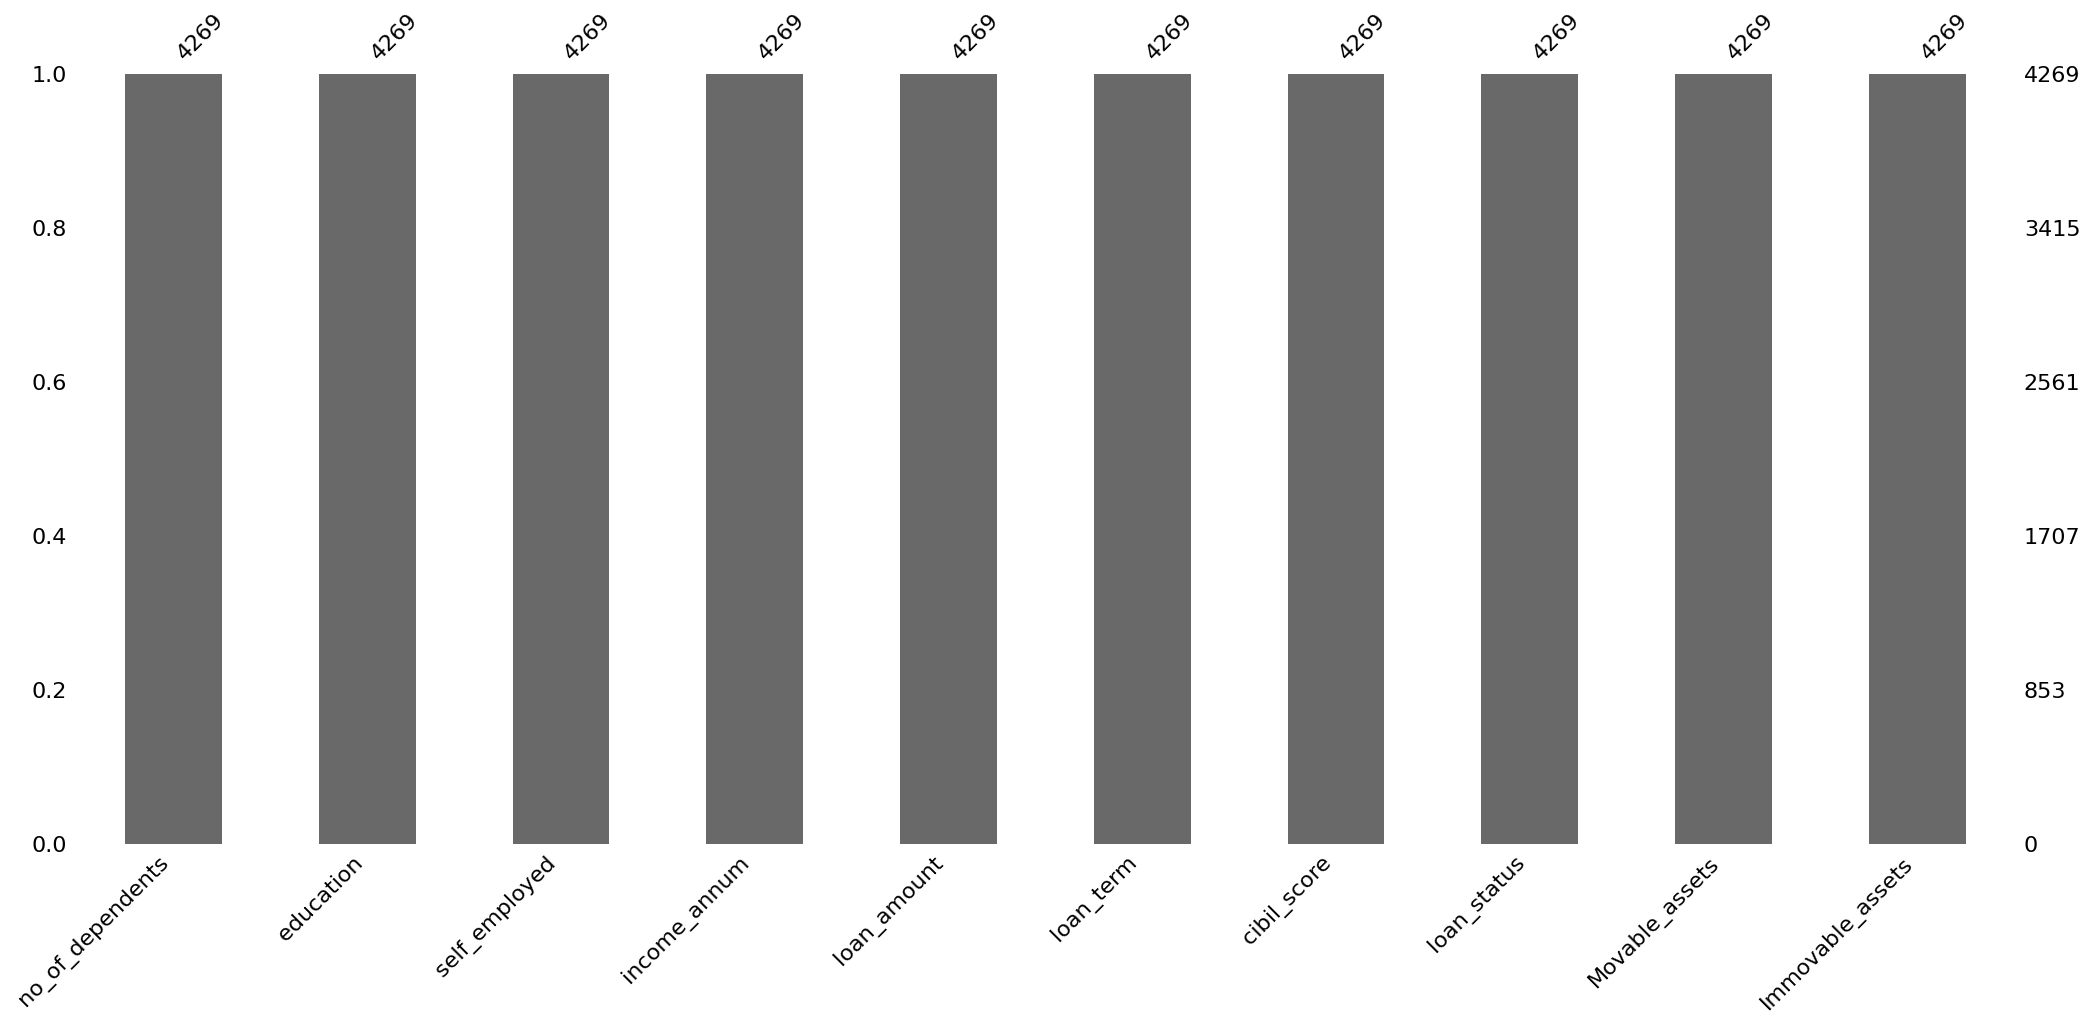

In [67]:
msno.bar(df)

In [68]:
#check the null value
print()
df.isna().sum()

 no_of_dependents    0
 education           0
 self_employed       0
 income_annum        0
 loan_amount         0
 loan_term           0
 cibil_score         0
 loan_status         0
Movable_assets       0
Immovable_assets     0
dtype: int64

In [69]:
#check the statistics of the dataset
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [70]:
#check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0    no_of_dependents  4269 non-null   int64 
 1    education         4269 non-null   object
 2    self_employed     4269 non-null   object
 3    income_annum      4269 non-null   int64 
 4    loan_amount       4269 non-null   int64 
 5    loan_term         4269 non-null   int64 
 6    cibil_score       4269 non-null   int64 
 7    loan_status       4269 non-null   object
 8   Movable_assets     4269 non-null   int64 
 9   Immovable_assets   4269 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 333.6+ KB


Insight:
1. there are 4269 entries
2. there are 12 features with the type of: int64 (9 features), object(3 features)
3. there are no missing value

# **3. Exploratory Data Analysis**

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# sns.set_style('dark')

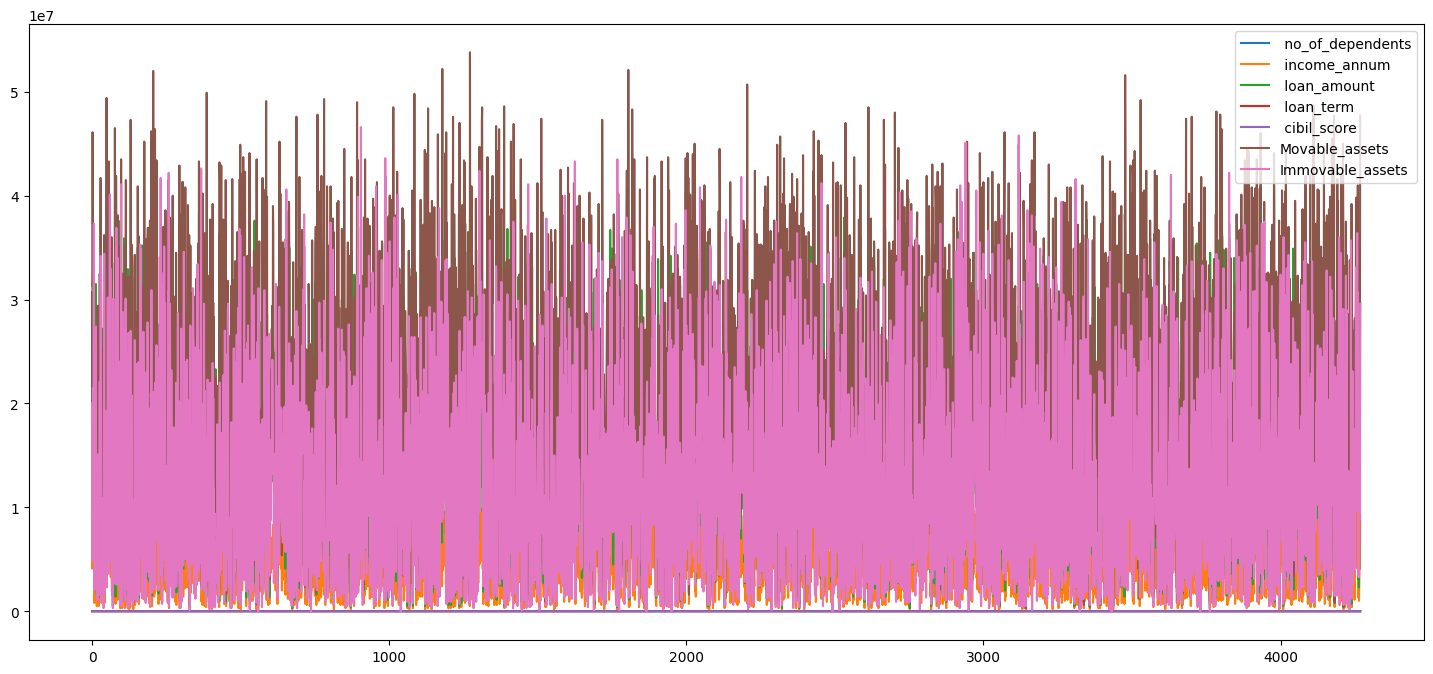

In [72]:
df.plot(figsize=(18, 8))

plt.show()

# 3.1. Number of Dependents Distribution Analysis

Menganalisis jumlah tanggungan dari applicants

Text(0.5, 1.0, 'Number of Dependents')

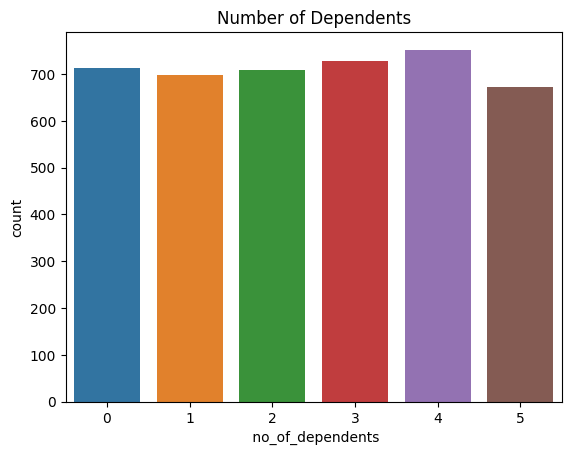

In [73]:
sns.countplot(x=' no_of_dependents', data = df).set_title('Number of Dependents')

Based on the visualization regarding the number of dependents from loan applicants, there is no significant difference regarding the number of dependents. For loan applications, we assume that the fewer the number of dependents, the higher the applicant's chance of loan approval. For further analysis, we need to check the other variables.


# **3.2. Number of dependents vs loan status**

<Axes: xlabel=' no_of_dependents', ylabel='count'>

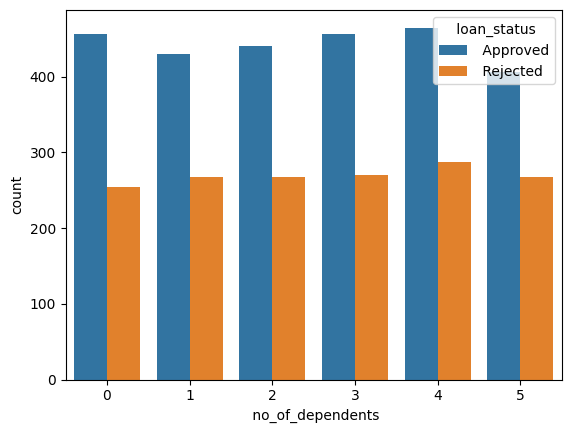

In [74]:
sns.countplot(x=' no_of_dependents', data=df, hue=' loan_status')

Based on the visualization above, we can find information that the fewer the number of dependent applicants, the greater the chance of getting accepted approval status

# 3.3. Education of the applicants

Text(0.5, 1.0, 'Self Employed')

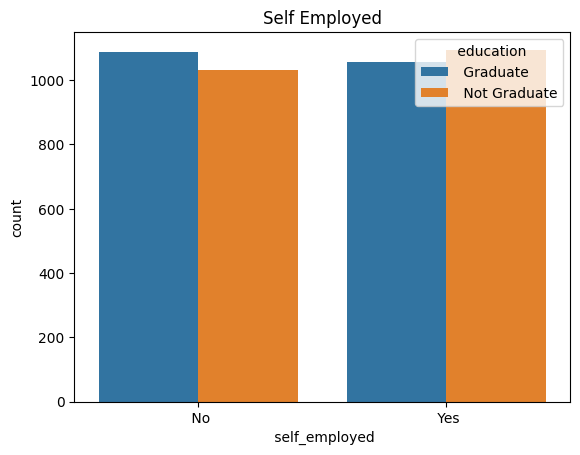

In [75]:
sns.countplot(x=' self_employed', data=df, hue=' education').set_title('Self Employed')

Based on the visualization above, information is obtained that the majority of applicants who are not graduates work as entrepreneurs. Meanwhile, the majority of Graduated applicants work and have the right salary. This information is important because it can show which applicants have a regular, fixed salary and not to determine whether the approval status is accepted or rejected. Applicants who have a fixed salary have the ability to pay loans on time compared to applicants who work as entrepreneurs.

# 3.4. Education and Income of Applicants

<Axes: xlabel=' education', ylabel=' income_annum'>

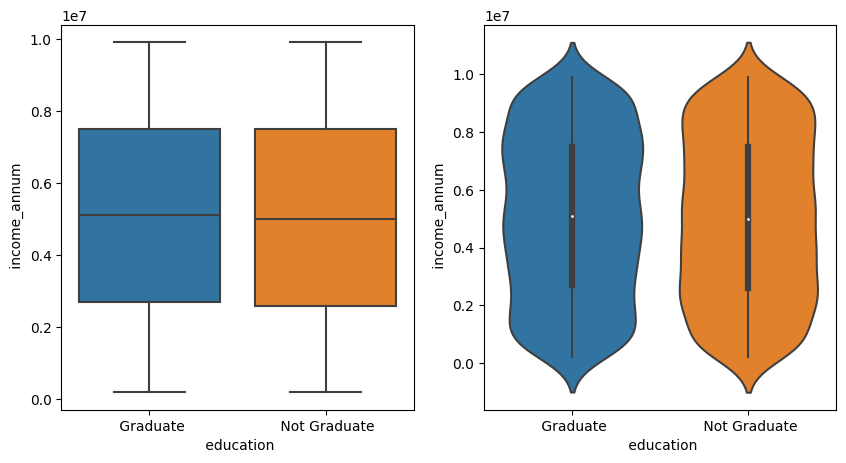

In [76]:
fig, ax=plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x=' education', y=' income_annum', data=df, ax=ax[0])
sns.violinplot(x=' education', y=' income_annum', data=df, ax=ax[1])

Based on the boxplot visualization, information is obtained that applicants with graduate and non-graduate educational status have the same median income, so it can be concluded that having a bachelor's degree does not necessarily have a higher income than those who do not have a bachelor's degree. Additionally, the violin plot shows the distribution of income between graduate and non-graduate applicants, where we can see that non-graduate applicants have an even distribution of income between 2000000 and 8000000 , while there is an uneven distribution between graduates and more applicants who have an income between 6000000 and 8000000.
Information can be obtained that education is not the main factor in determining loan approval.

# **3.5. Education vs Loan Status**

Text(0.5, 1.0, 'Loan Status by Education')

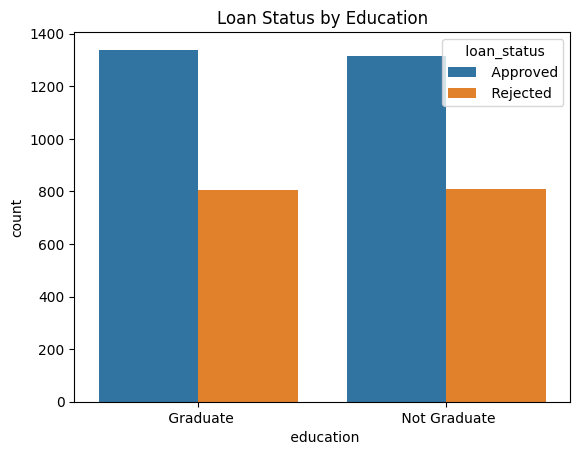

In [77]:
sns.countplot(x=' education', hue= ' loan_status', data=df).set_title('Loan Status by Education')

Berdasarkan visualisasi diatas diperoleh informasi bahwa hanya terdapat sedikit perbedaan antara banyaknya applicant dengan status pinjaman diterima dan ditolak dengan background pendidikan sarjana dan bukan sarjana. Berdasarkan informasi tersebut dapat dikatakan bahwa background pendidikan tidak berpengaruh secara signifikan terhadap peluang diterimanya pinjaman.

# 3.6. Loan_Amount and Terms

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

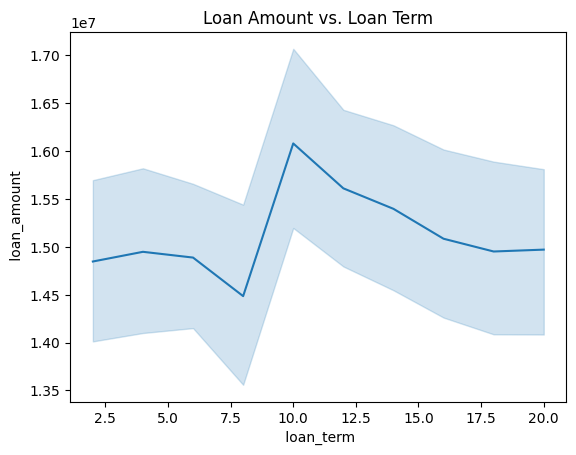

In [78]:
sns.lineplot(x= ' loan_term', y= ' loan_amount', data=df).set_title('Loan Amount vs. Loan Term')

In [79]:
df.head(1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000


Visualisasi diatas menunjukkan tren antara jumlah pinjaman dan jangka waktu pinjaman

# 3.7. Loan Amount and Loan Status

<Axes: xlabel=' loan_status', ylabel=' loan_amount'>

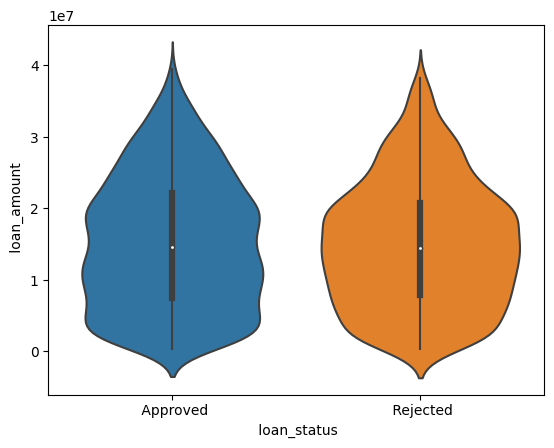

In [80]:
sns.violinplot(x=' loan_status', y=' loan_amount', data=df)

# 3.7. Loan amount and tenure vs loan status

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

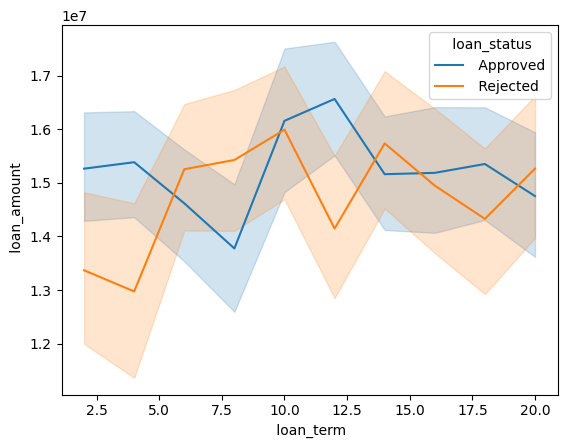

In [81]:
sns.lineplot(x= ' loan_term', y=' loan_amount', data=df, hue=' loan_status')

# 3.8. CIBIL Score Distribution

<Axes: xlabel=' cibil_score', ylabel='Count'>

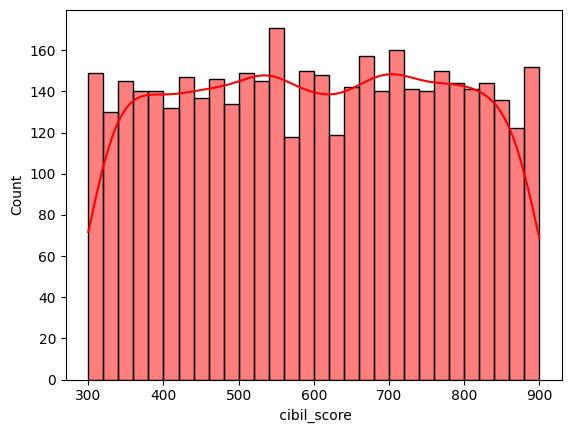

In [82]:
#melihat distribusi dari cibil_score
sns.histplot(df[" cibil_score"], bins=30, kde=True, color='red')

# 3.8. Cibil Score vs Loan Status

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

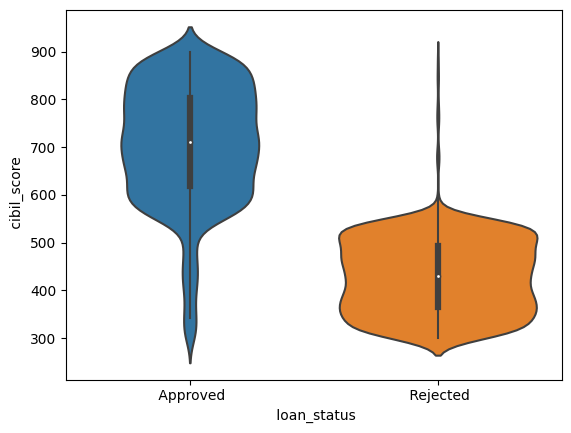

In [83]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

# 3.9 Asset Distribution

Text(0.5, 1.0, 'Immovable_assets ')

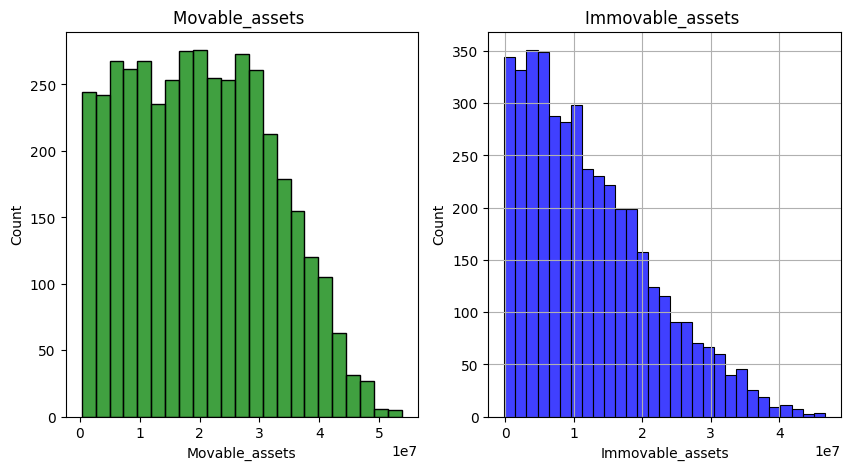

In [84]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(df['Movable_assets'], ax=ax[0], color='green')
plt.title("Movable_assets ")

plt.subplot(1, 2, 2)
plt.grid()
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')
plt.title("Immovable_assets ")


The visualization above shows how many people have assets based on two types of assets, namely movable assets and immovable assets. For movable assets, most applications have assets of less than 30 million. Meanwhile, for immovable assets, most applicants have immovable assets of less than 15 million. The graph above provides information that most applicants have assets of lower value and the number of applicants who have more assets is small

# 3.10. Assets and Loan Status

<Axes: xlabel='Immovable_assets', ylabel='Count'>

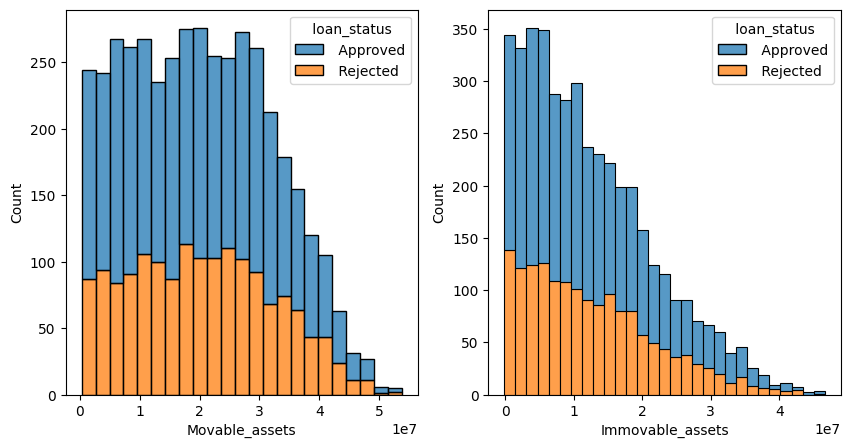

In [85]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
sns.histplot(x='Movable_assets', data=df, ax=ax[0], hue=' loan_status', multiple='stack')
sns.histplot(x= 'Immovable_assets', data=df, ax=ax[1], hue=' loan_status', multiple='stack')

The visualization above shows the relationship between the number of movable assets and immovable assets and loan approval. The two graphs above provide information that as the amount of assets increases, the possibility of receiving a loan also increases. Apart from that, based on the graph above, information is also obtained that there are more movable assets than immovable assets owned by applicants.

In [86]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


# **4. Data Preprocessing**

# 4.1. Label Encoding

In [87]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [88]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


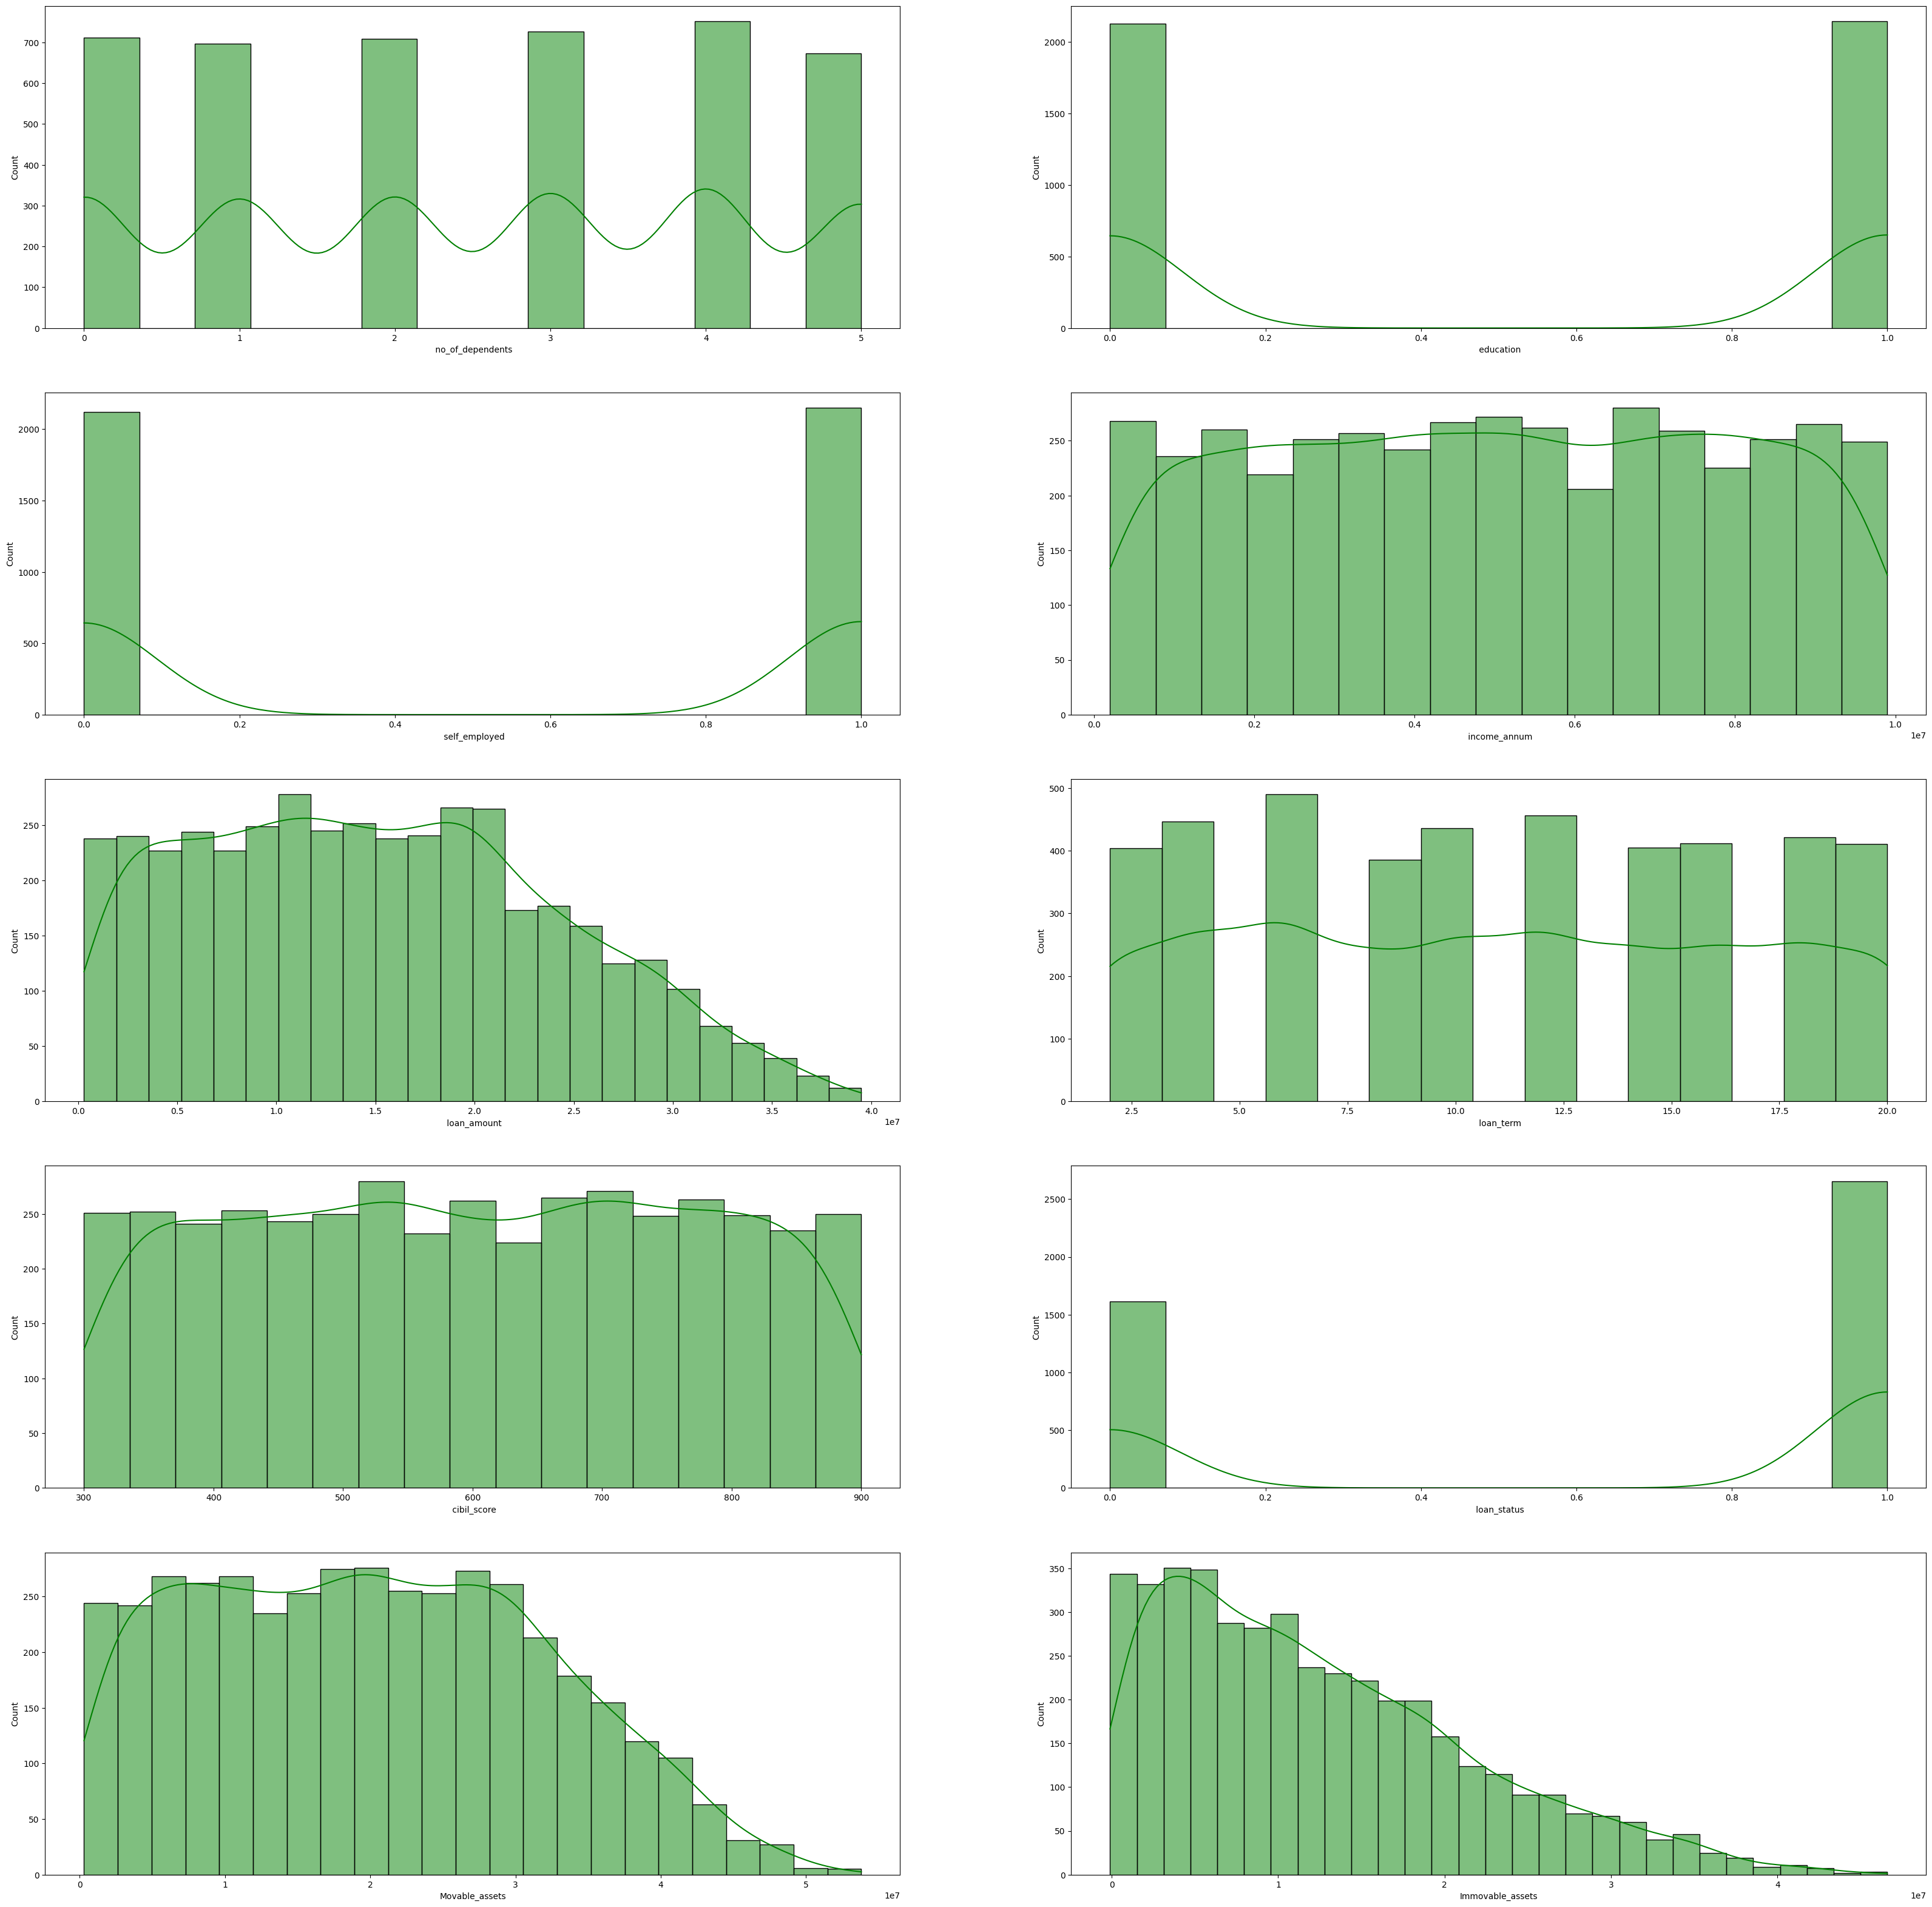

In [89]:
fig, axes=plt.subplots(nrows=5, ncols=2)
axes=axes.flatten()
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.histplot(df[col], kde=True, color='green',ax=ax)

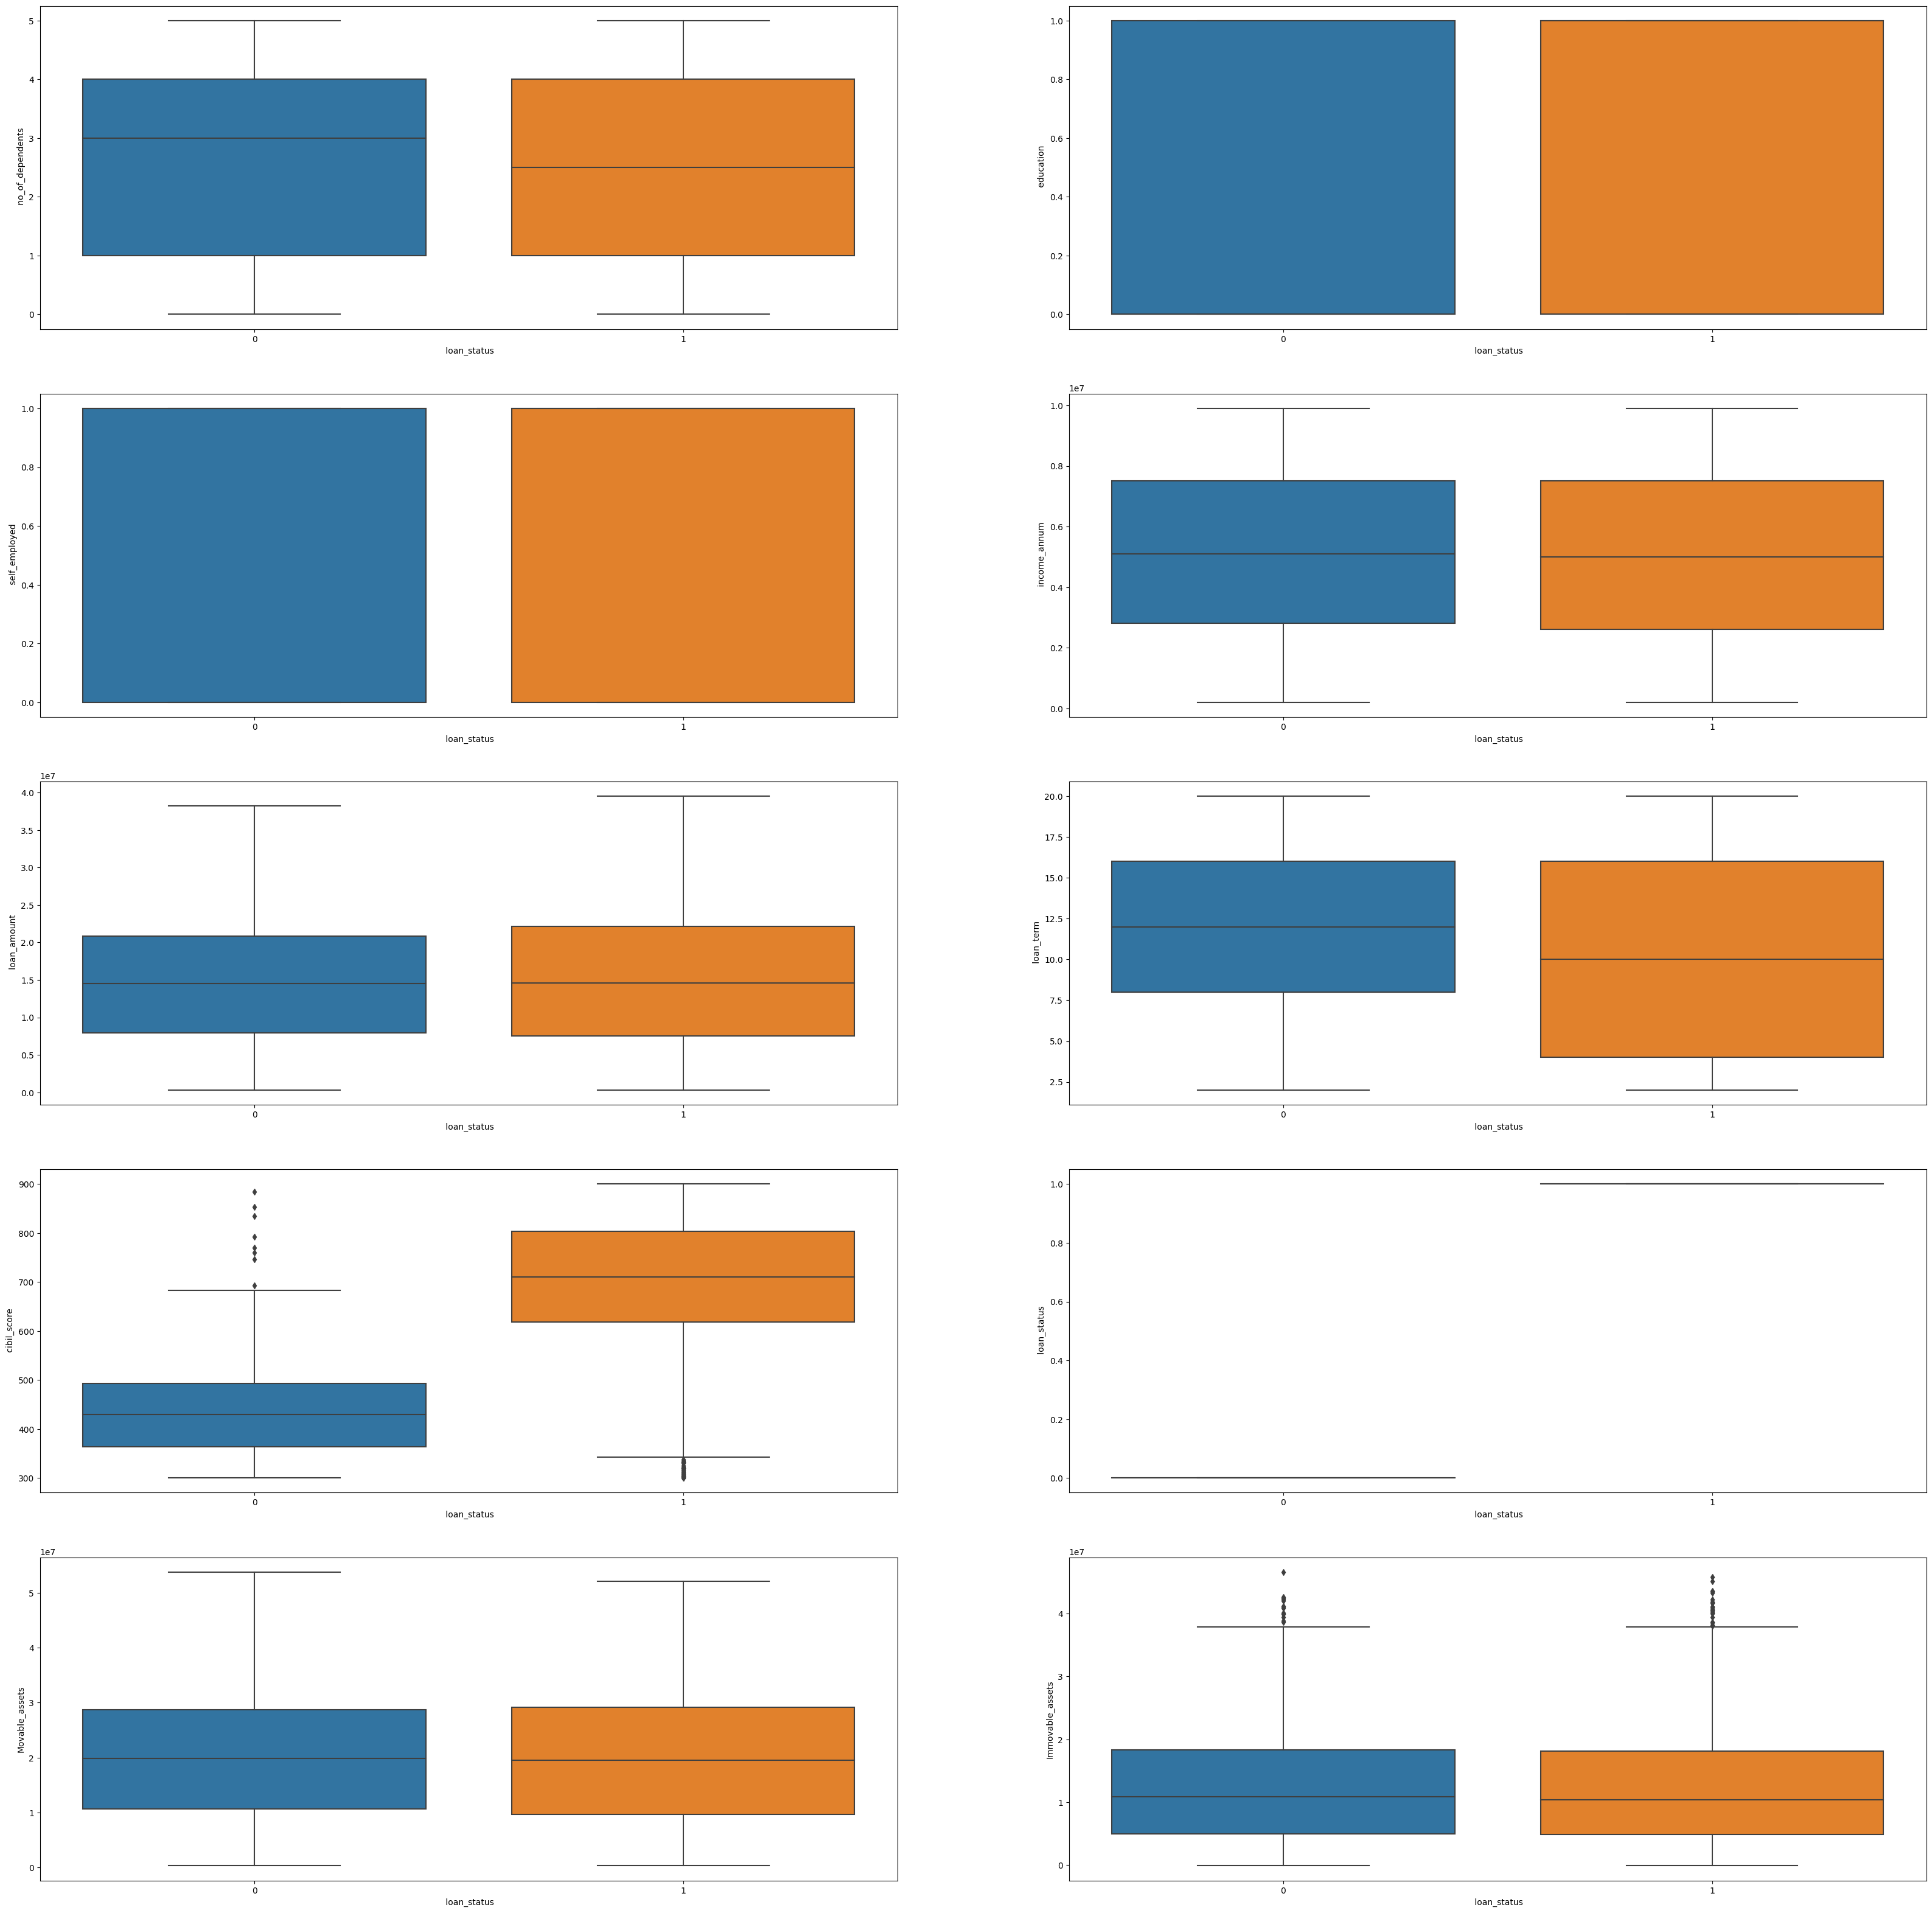

In [90]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.boxplot(x=' loan_status',y=df[col], ax = ax , data=df)

In [91]:
import warnings

# Suppress warnings within this code block
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

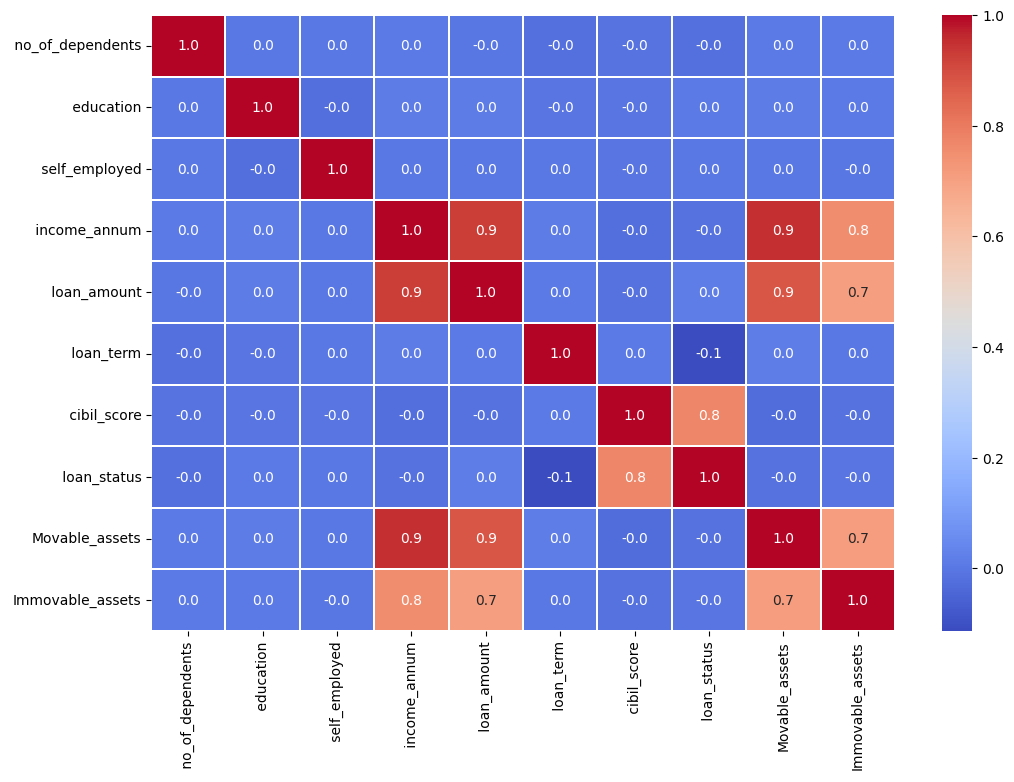

In [92]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [93]:
df.corr()[' loan_status']

 no_of_dependents   -0.018114
 education           0.004918
 self_employed       0.000345
 income_annum       -0.015189
 loan_amount         0.016150
 loan_term          -0.113036
 cibil_score         0.770518
 loan_status         1.000000
Movable_assets      -0.013755
Immovable_assets    -0.006200
Name:  loan_status, dtype: float64

Berdasarkan heatmap diatas diperoleh informsi bahwa terdapat korelasi yang kuat antara:
1. Movable asset dan immovable assets
2. income and movable assets
3. income and immovable assets
4. movable assets and loan amount
5. immovable assets and loan amount
6. loan status and cibil score
7. loan amount and income

# **5. Machine Learning Model**

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn import tree

In [100]:
#train test split
X_train, X_test, y_train, y_test=train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

# 5.1. Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(X_train, y_train)
predictions=lgr.predict(X_test)

In [102]:
#accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6276346604215457


# 5.2. Support Vector Classification (SVC)

In [103]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train, y_train)
predictions=model.predict(X_test)

#accuracy
accuracy=accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6276346604215457


# 5.3. Decision Tree Classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred=dtree.predict(X_test)

#training accuracy
dtree.score(X_train, y_train)


1.0

In [105]:
#testing accuracy
accuracy=accuracy_score(y_test, dtree_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9800936768149883


# 5.4. Random Forest Classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
#training
rfc.fit(X_train, y_train)
rfc_pred=rfc.predict(X_test)

#accuracy
accuracy=accuracy_score(y_test, rfc_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9742388758782201


# **Evaluation with Confusion Matrix**

Text(518.4494949494949, 0.5, 'Actual')

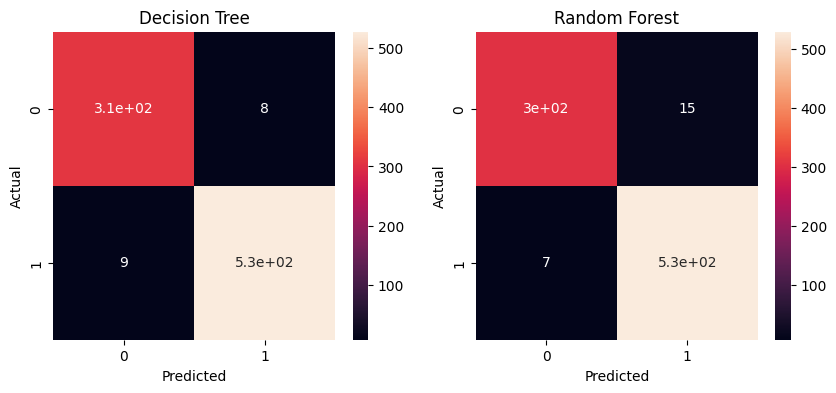

In [109]:
from sklearn.metrics import confusion_matrix

fig, ax=plt.subplots(1,2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')